In [64]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-whitegrid')

df = pd.read_csv('data/wine.csv')

In [74]:
df['qual_cat'] = pd.cut(df['quality'], bins = [0, 5, 6, 9],
       labels = ['low', 'medium', 'high'])

In [75]:
df['qual_cat'].value_counts()

medium    2836
low       2384
high      1277
Name: qual_cat, dtype: int64

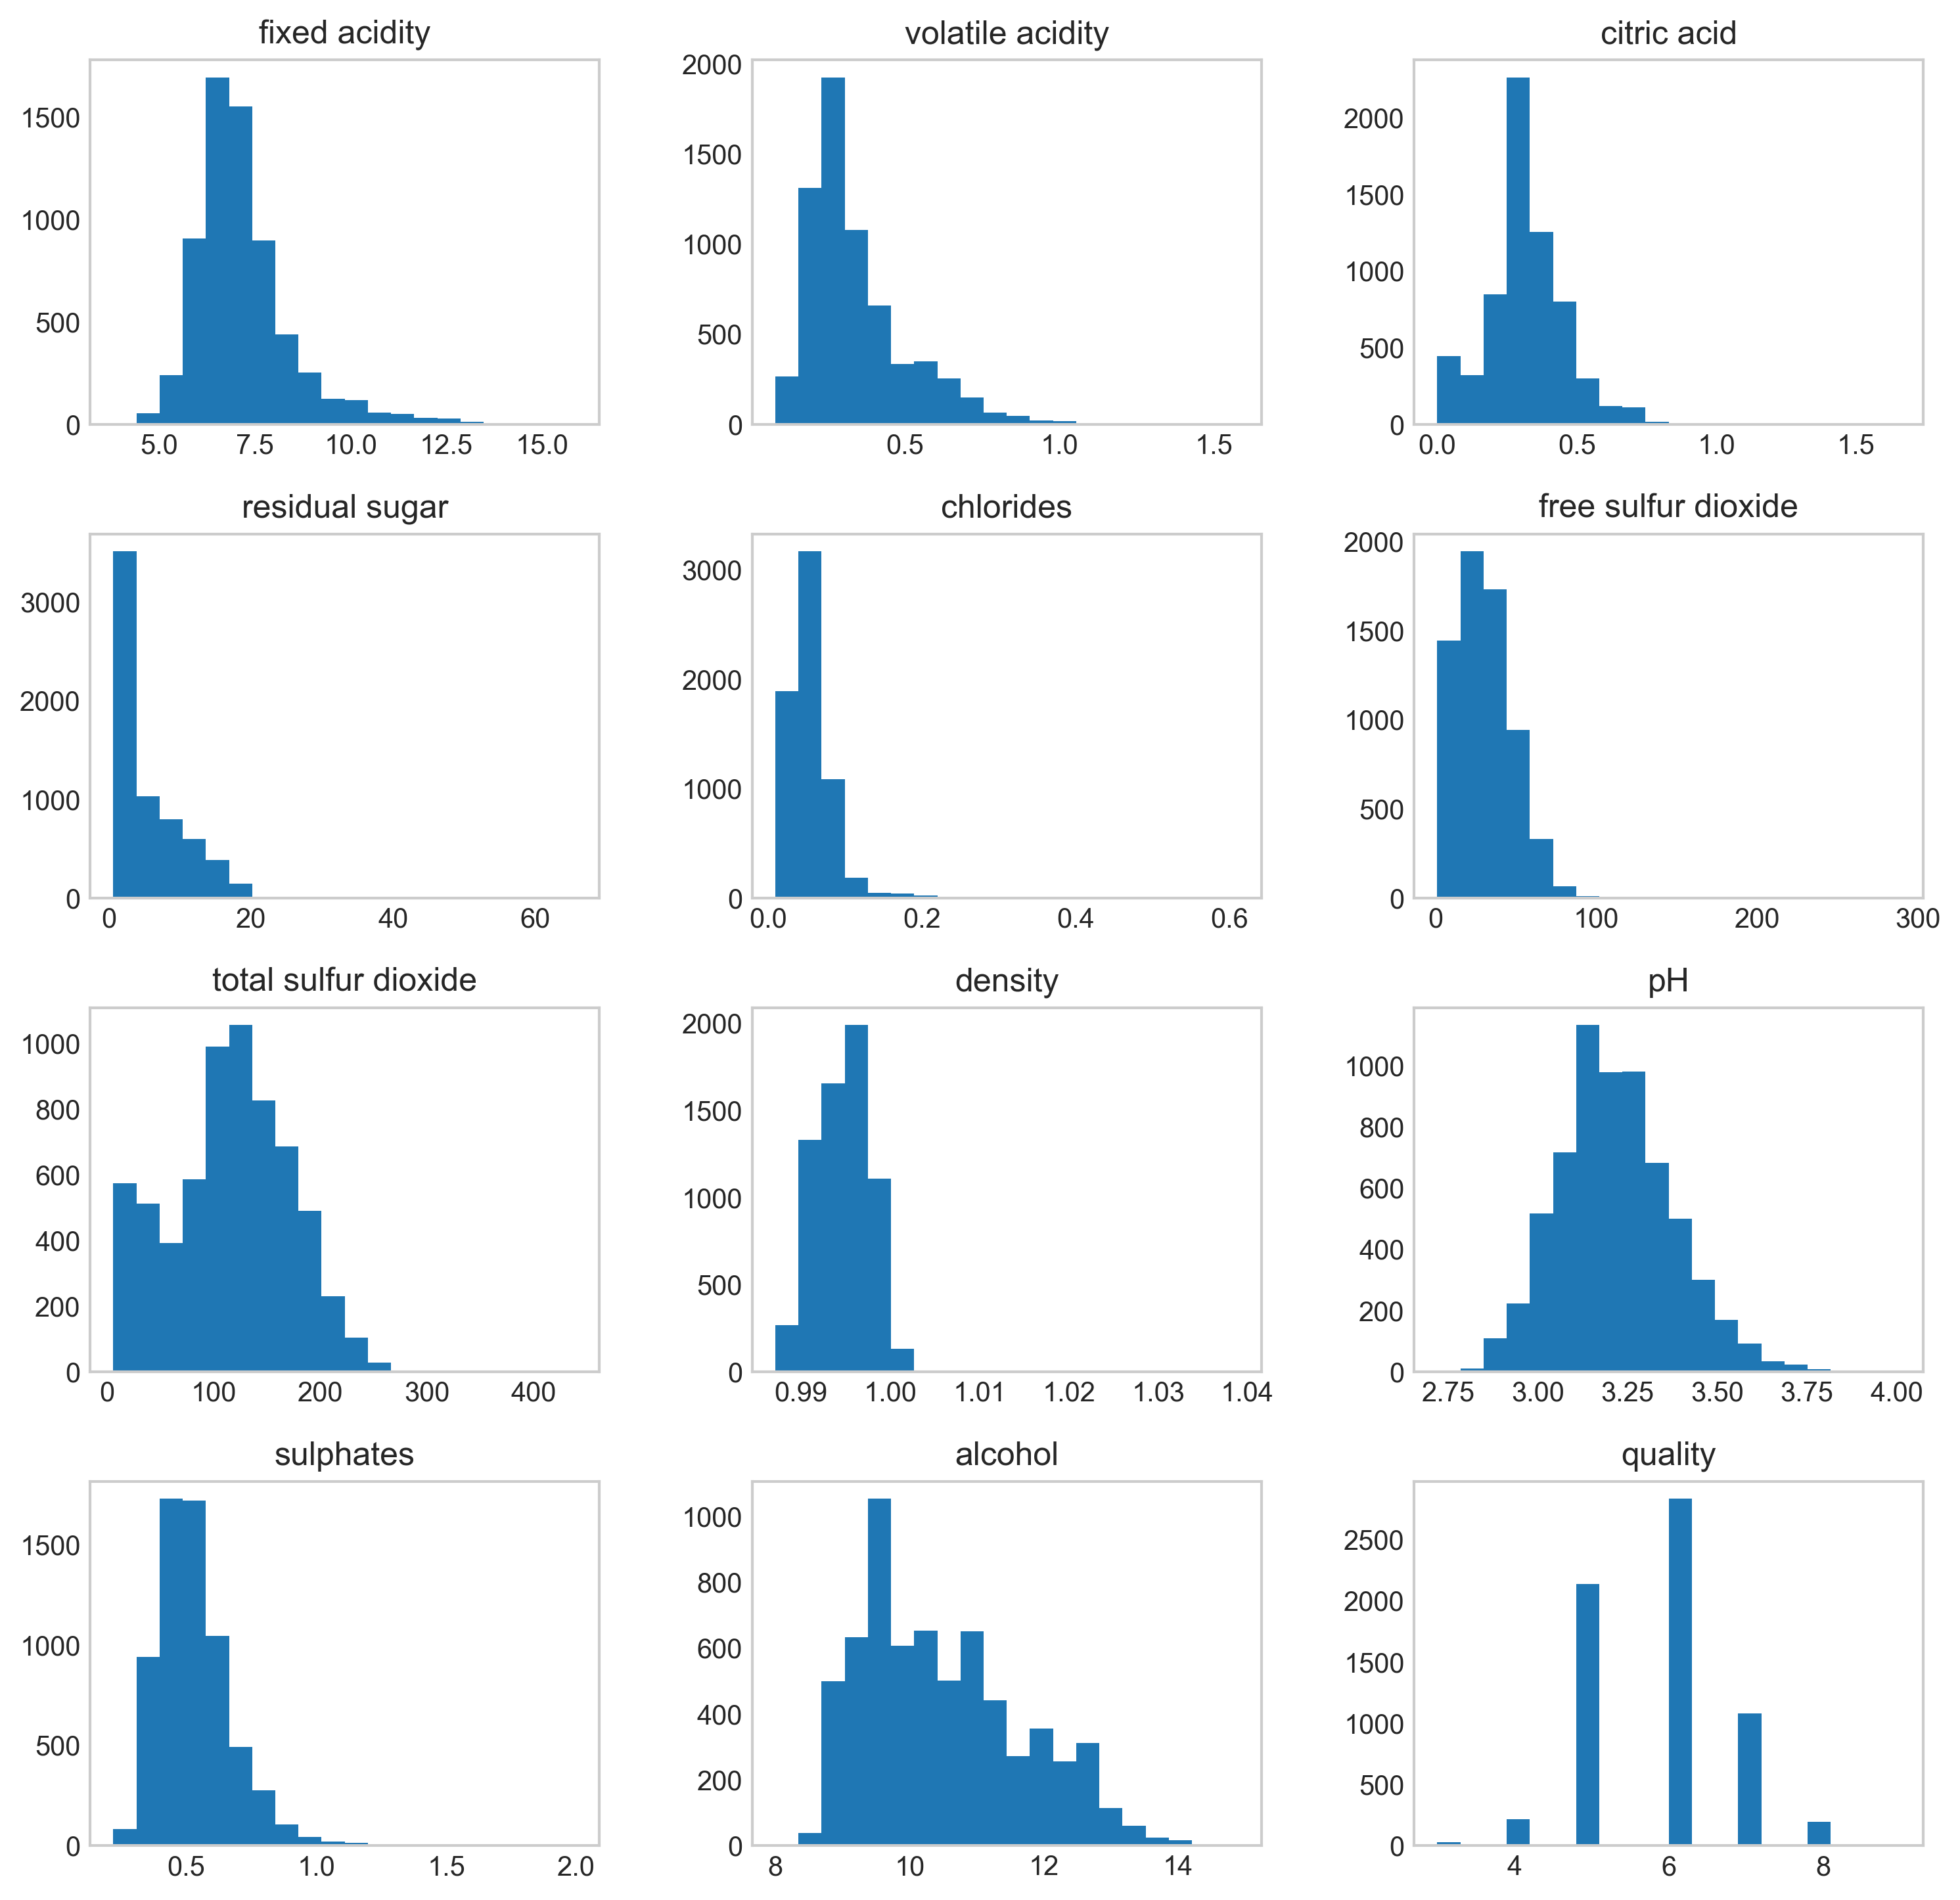

In [71]:
df.hist(figsize = (12,12), grid = False, bins = 20)

plt.show()

In [76]:
df.groupby('qual_cat').median()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
qual_cat,,,,,,,,,,,,
low,7.1,0.3375,0.295,2.9,0.052,26.0,124.0,0.99600,3.20,0.50,9.6,5.0
medium,6.9,0.2700,0.310,3.1,0.046,29.0,117.0,0.99470,3.21,0.51,10.5,6.0
high,6.9,0.2700,0.320,2.9,0.039,31.0,114.0,0.99228,3.22,0.51,11.5,7.0


In [103]:
dv = 'fixed acidity'
group = 'qual_cat'

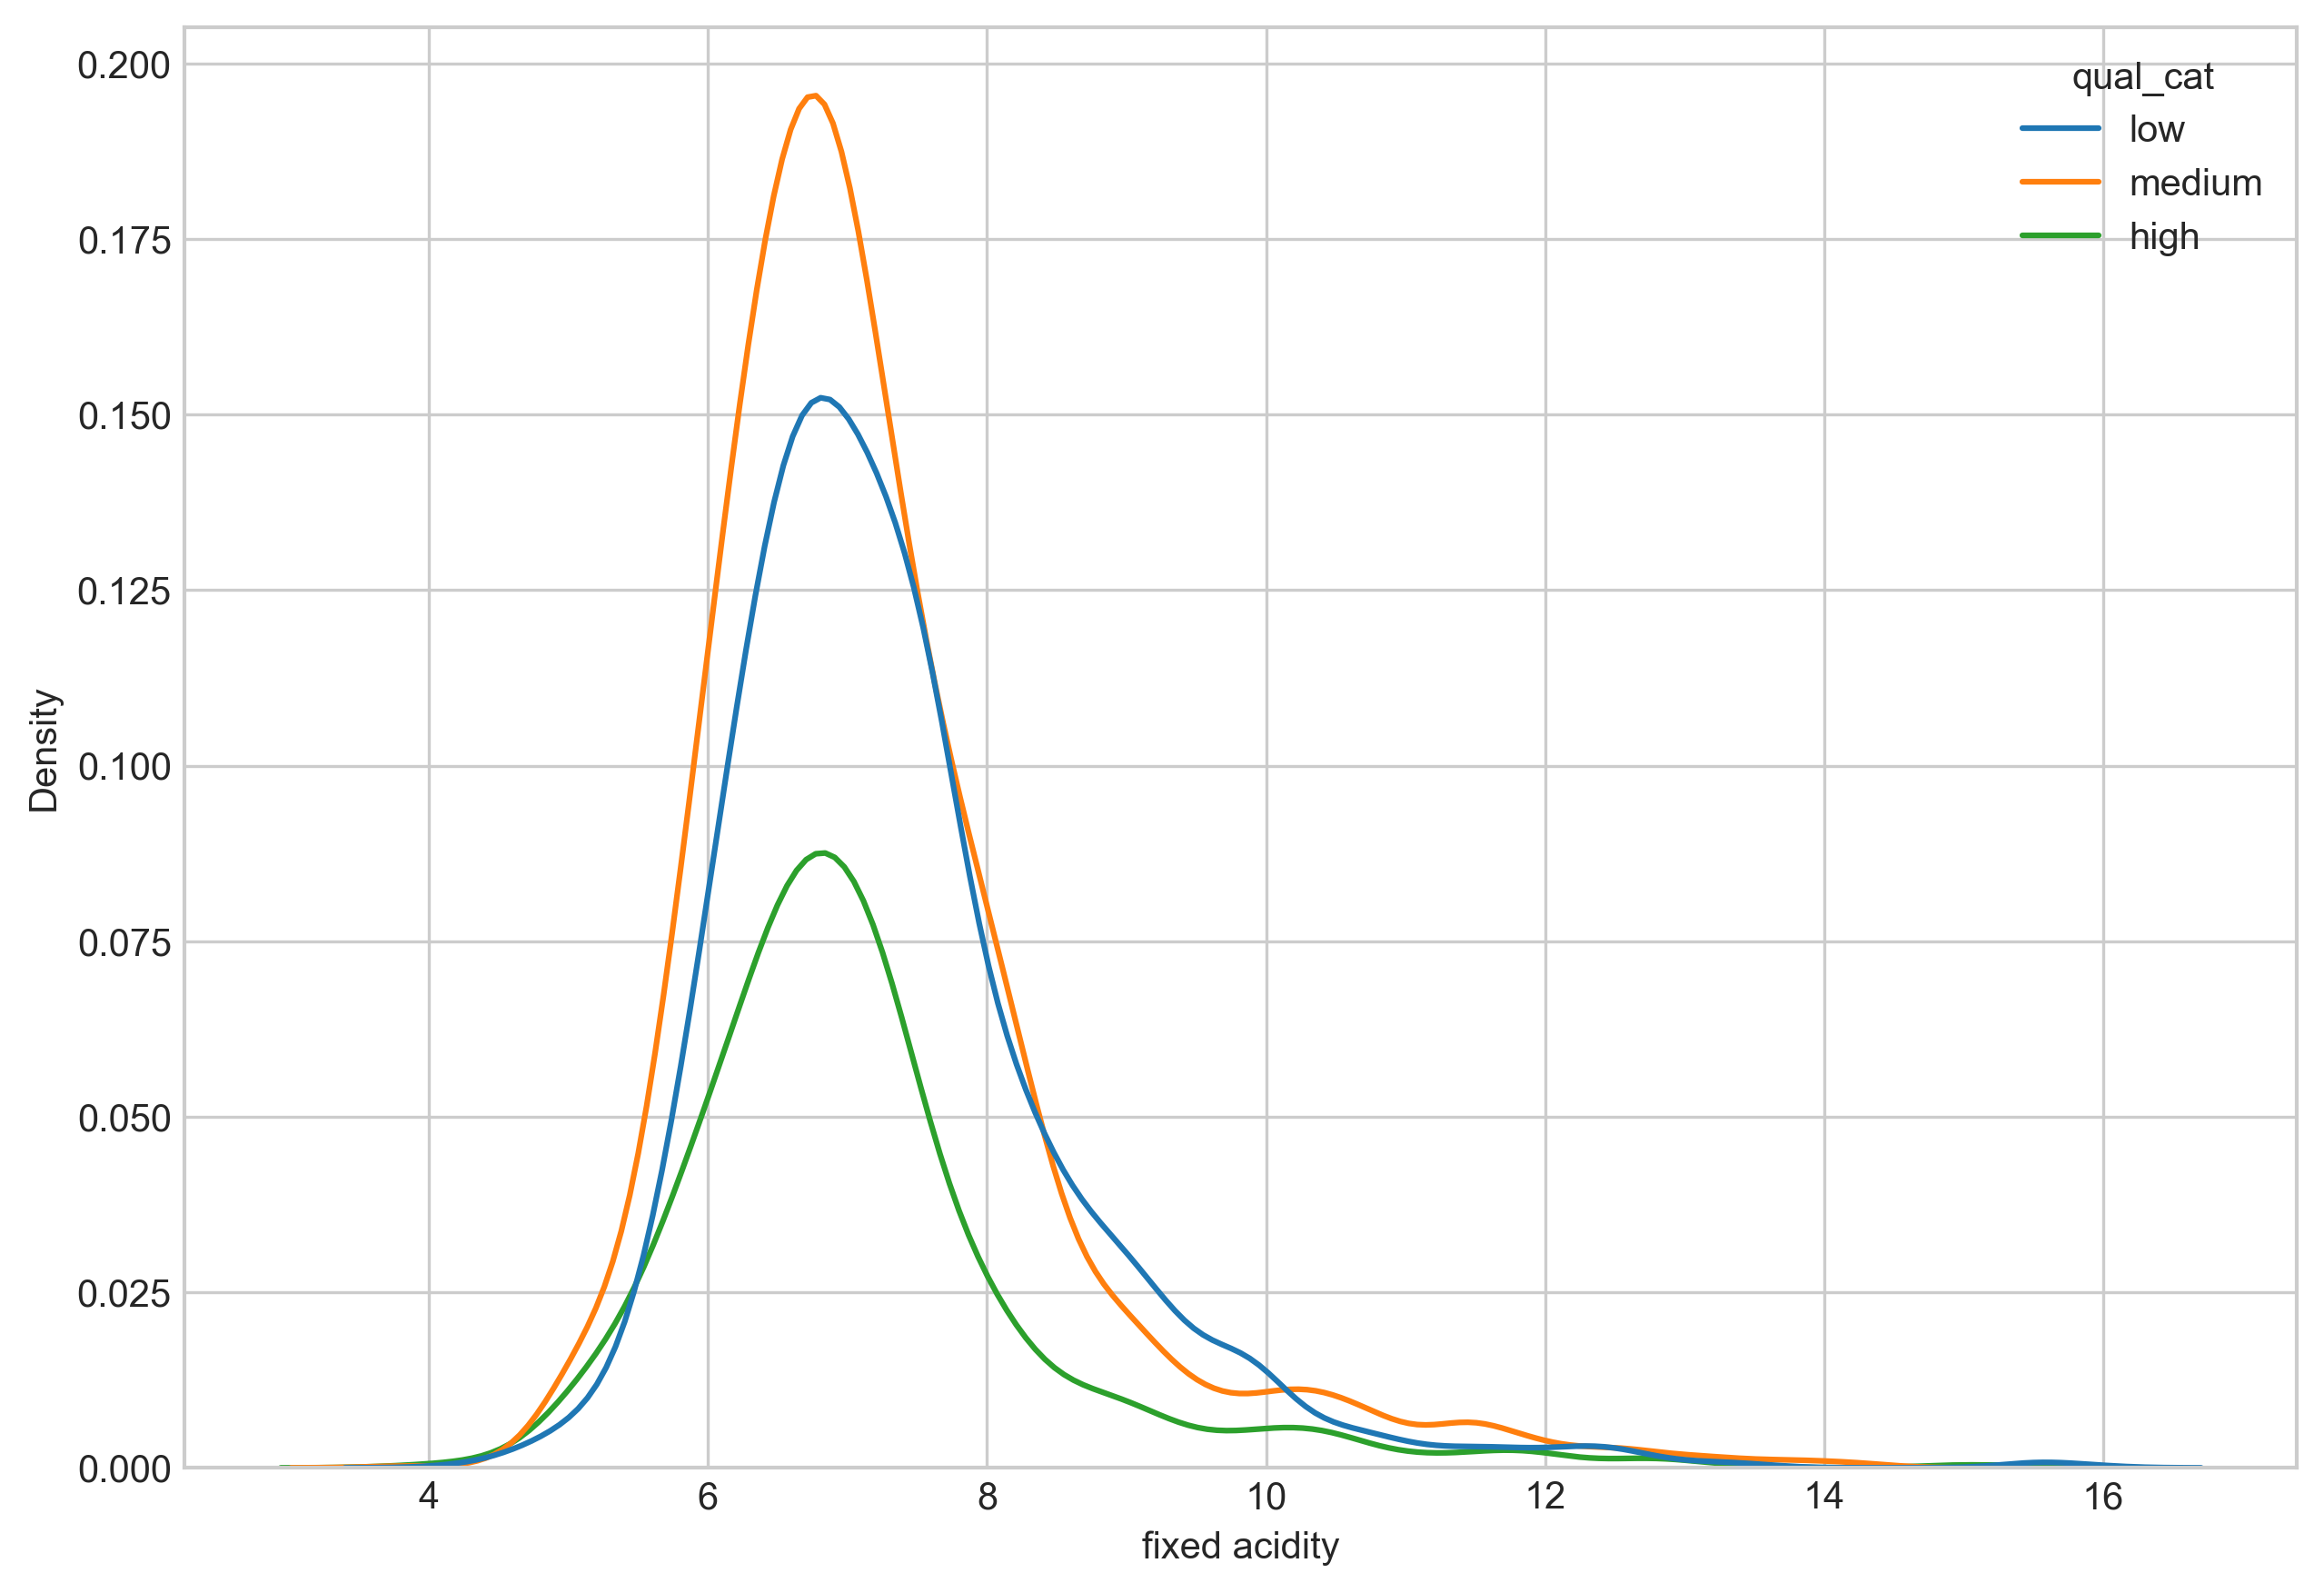

In [104]:
fig, ax = plt.subplots(figsize = (10,7))

sns.kdeplot(data = df, x = dv, hue = group)

plt.show()

In [105]:
pg.normality(df, dv = dv, group = group, method = 'jarque_bera')

,W,pval,normal
low,3798.894038,0.0,False
medium,4010.994569,0.0,False
high,2637.268986,0.0,False


In [106]:
pg.kruskal(df, dv = dv, between = group)

,Source,ddof1,H,p-unc
Kruskal,qual_cat,2,62.637334,2.503086e-14


In [107]:
pg.pairwise_tests(df, dv = dv, between = group, parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,qual_cat,low,medium,False,False,3698072.5,two-sided,4.674106e-09,0.119229
1,qual_cat,low,high,False,False,1745576.5,two-sided,2.247791e-13,0.188620
2,qual_cat,medium,high,False,False,1907303.5,two-sided,6.130007e-03,0.070008
